In [1]:
import os
import gc
from tqdm import tqdm
import illustris_python as il
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

# %matplotlib widget
basePath = "./sims.TNG/TNG50-1/output"

Snapshot_Init = 71
Snapshot_End = 99
Lbsg_Indcies_Array = np.array(
    [117251, 300903, 324123, 329508, 382215,
        400973, 419618, 457431, 460722, 490814]
)

h = 0.6774  # km/Mpc

m_dm = 4.5e-5  # E10M_Sum
m_dm_h = m_dm * h

Critial_Density = 1.27e-8  # E10M_Sum/kpc^3
Critial_Density_h = Critial_Density / h**2  # E10M_Sum/(kpc/h)^3


In [2]:
Subhalo_Index_At_99=329508
Subhalo_Dict_At_99=il.groupcat.loadSingle(basePath,Snapshot_End,-1,Subhalo_Index_At_99)


In [3]:
Sublink_Fields=['SubfindID','SnapNum']


In [66]:
il.sublink.loadTree(basePath,99,Subhalo_Index_At_99,Sublink_Fields,onlyMPB=1)


{'count': 99,
 'SubfindID': array([329508, 329045, 325941, 323872, 322167, 318956, 315009, 314669,
        309873, 302211, 299817, 295276, 293174, 289164, 286487, 280379,
        273994, 271730, 269975, 268108, 264326, 262399, 260935, 257844,
        254640, 247555, 250593, 241928, 232377, 220165, 215980, 214057,
        211991, 209820, 205211, 184704, 171321, 170176, 163331, 162126,
        158822, 156135, 157140, 154894, 152796, 144633, 145765, 140683,
        156816, 153494, 151763, 145660, 139042, 130895, 121961, 120173,
        118400, 119619, 107743,  98181,  99770,  95286,  88903,  81233,
         73786,  80035,  74681,  69878,  70455,  60695,  52413,  46598,
         43668,  47335,  43126,  59516,  62481,  49323,  41369,  35088,
         29554,  25162,  36050,  28415,  24744,  19723,  11819,   9261,
         37024,  32301,  25961,  20231,  18981,  14193,   9425,   7250,
         10708,   5002,   9308], dtype=int32),
 'SnapNum': array([99, 98, 97, 96, 95, 94, 93, 92, 91, 90, 89,

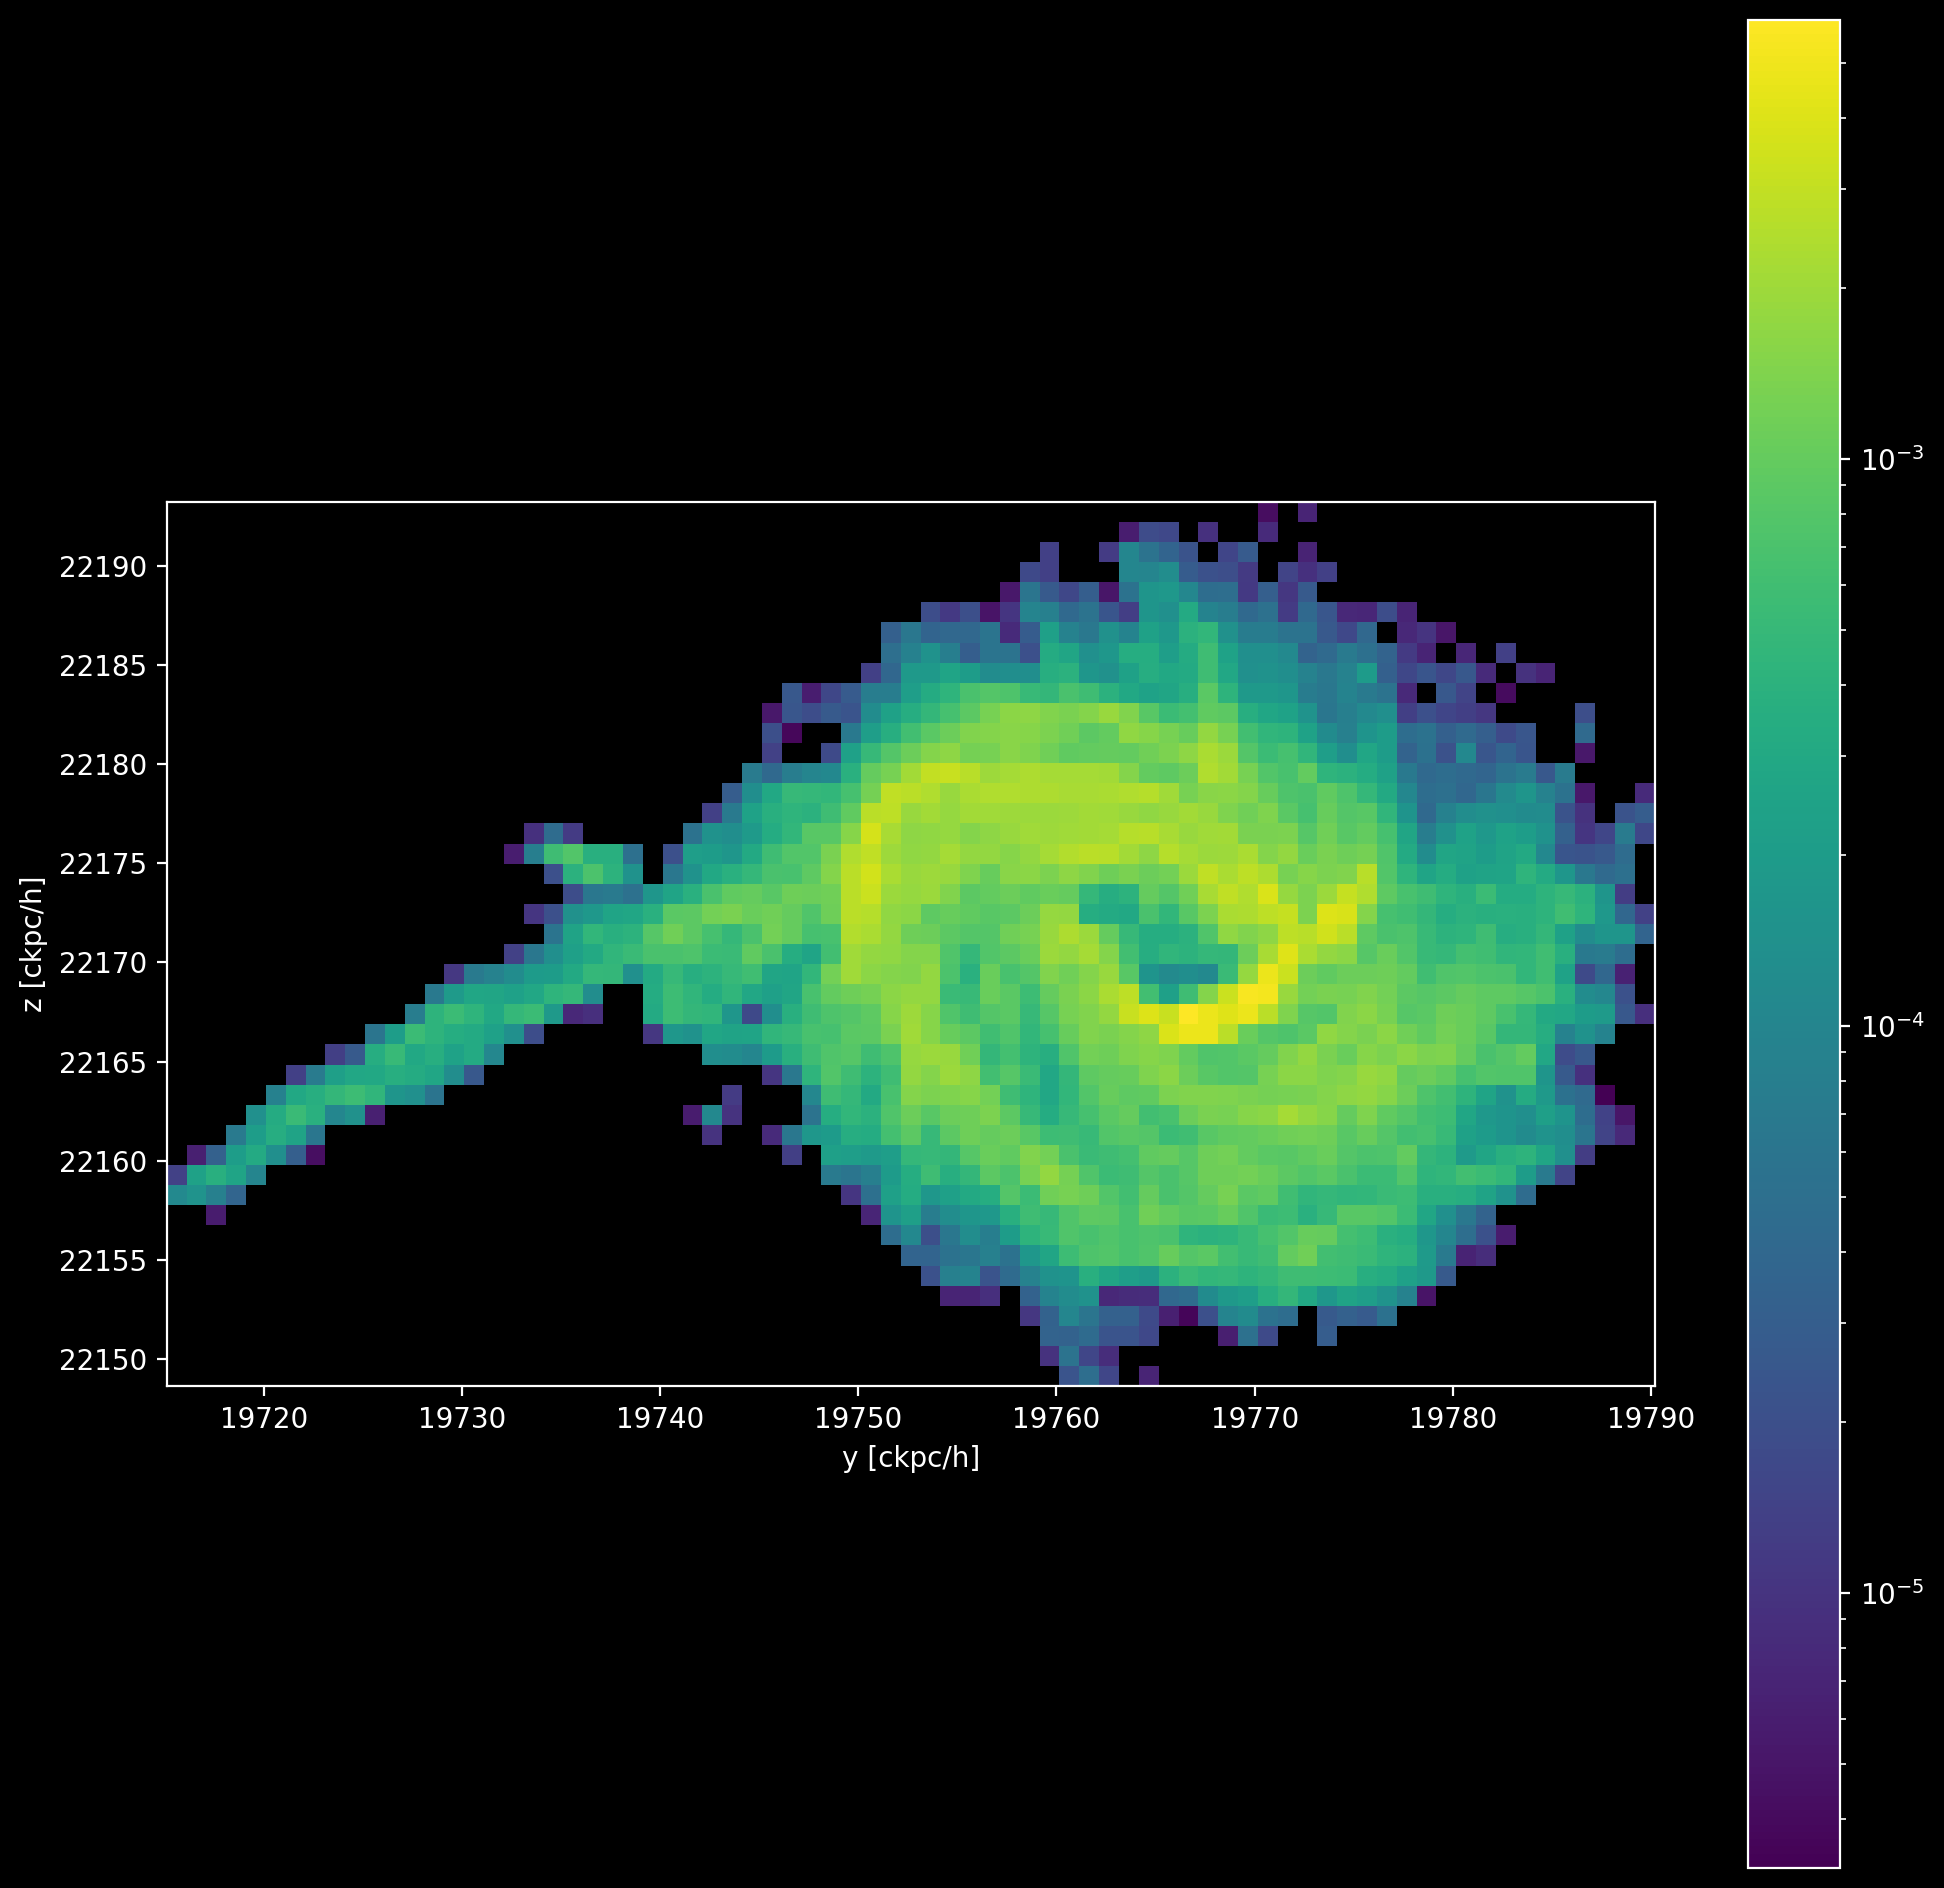

In [63]:
gas_data=il.snapshot.loadSubhalo(basePath, 85, 286488, 'gas', fields=['Coordinates','Masses'])


GasCoordinates = gas_data['Coordinates']
Masses = gas_data['Masses']



GasCoorMin = GasCoordinates.min(axis=0)
GasCoorMax = GasCoordinates.max(axis=0)
plt.figure(figsize=(12, 12), dpi=200)

plt.style.use("dark_background")
bars=(GasCoorMax-GasCoorMin)
h, _, _, image = plt.hist2d(GasCoordinates[:, 1],
                            GasCoordinates[:, 2],
                            weights=Masses,

                            norm=mpl.colors.LogNorm(),
                            bins=(int(bars[1]),int(bars[2])))
plt.xlim([GasCoorMin[1],GasCoorMax[1]])
plt.ylim([GasCoorMin[2],GasCoorMax[2]])
plt.xlabel('y [ckpc/h]')
plt.ylabel('z [ckpc/h]')

plt.colorbar(image)
plt.gca().set_aspect(1)


In [68]:
il.sublink.loadTree(basePath,85, 286488,Sublink_Fields)


{'count': 70958,
 'SubfindID': array([ 286488,  280380,  273995, ..., 4938394, 4910089, 6136602],
       dtype=int32),
 'SnapNum': array([85, 84, 83, ..., 14, 13, 12], dtype=int16)}

In [69]:
def subhaloID2subfindID (subhaloID,sublink):
    subhaloID_array=sublink['SubhaloID']
    subfindIndex=np.where(subhaloID_array==subhaloID)
    subfindID=sublink['SubfindID'][subfindIndex]

    return subfindID

def DescendantSubfindID(subfindID,snapshot_num,sublink):
    tree_fields=['SubfindID','SnapNum','DescendantID']
    subfindid_snapnum_tree=il.sublink.loadTree(basePath, snapshot_num,subfindID, fields=tree_fields, onlyMPB=True)
    if subfindid_snapnum_tree['DescendantID'][0]==-1:return -1
    descendant_subfind_id=subhaloID2subfindID(subfindid_snapnum_tree['DescendantID'][0],sublink)[0]
    return descendant_subfind_id


In [71]:
DescendantSubfindID(286488,85,il.sublink.loadTree(basePath,99,329508))


289165